# Exercise 06

Montecarlo simulation of the 4d U(1) gauge theory using metropolis and over-relaxation updates.

A c++ code to simulate the theory is available in the folder 'code', and the data from which these plots are made are in 'code/results'

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Lvalues = [4, 6, 8, 10]

def plot_data(my_plot, data_index):
    for L in Lvalues:
        str_lbl = "L=" + str(L)
        my_plot.errorbar(dat[L][:,0], dat[L][:,data_index], yerr=dat[L][:,data_index+1], marker='.', label=str_lbl)
    my_plot.axvline(x=1.011128, label="critical beta", linestyle='--', color="grey")
    my_plot.xlabel('beta')
    my_plot.legend()
    my_plot.rcParams["figure.figsize"] = (20,10)

dat = {}
for L in Lvalues:
    V = np.power(L,4)
    raw_data = np.loadtxt("code/results/L" + str(L) + ".txt")
    #construct specific heat and magnetic susceptibility from averages of  E, E^2, M, M^2:
    raw_data[:,3] = V*(raw_data[:,3] - raw_data[:,1]*raw_data[:,1])
    raw_data[:,4] = (0*raw_data[:,4])
    raw_data[:,7] = V*(raw_data[:,7] - raw_data[:,5]*raw_data[:,5])
    raw_data[:,8] = (0*raw_data[:,8])
    dat[L] = raw_data

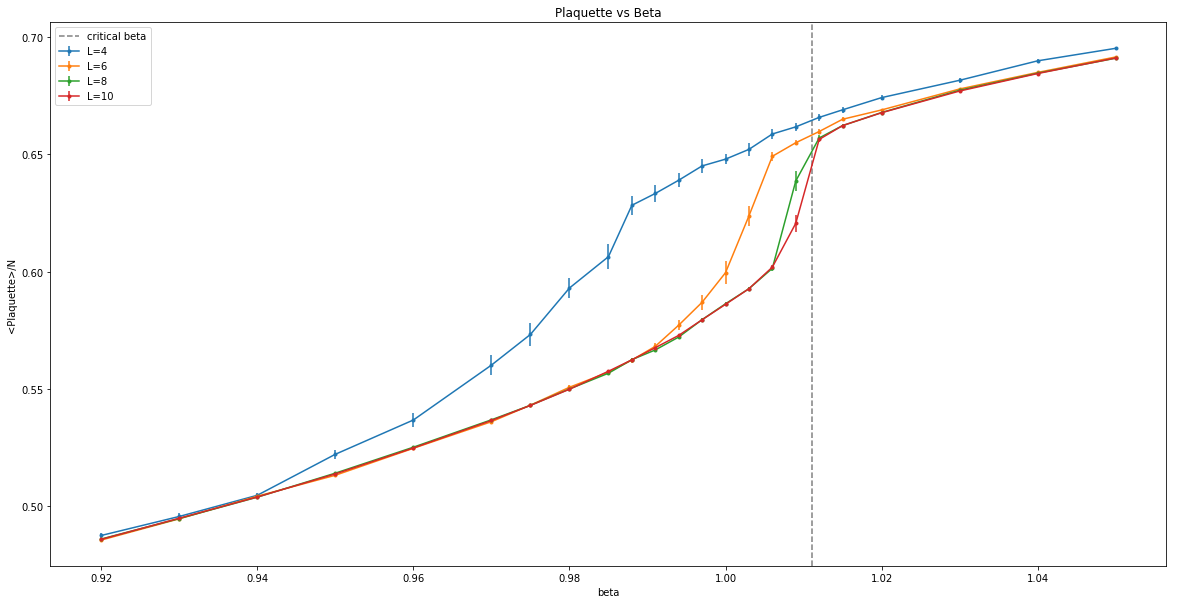

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plot_data(plt, 1)
plt.ylabel('<Plaquette>/N')
plt.title('Plaquette vs Beta')
plt.show()

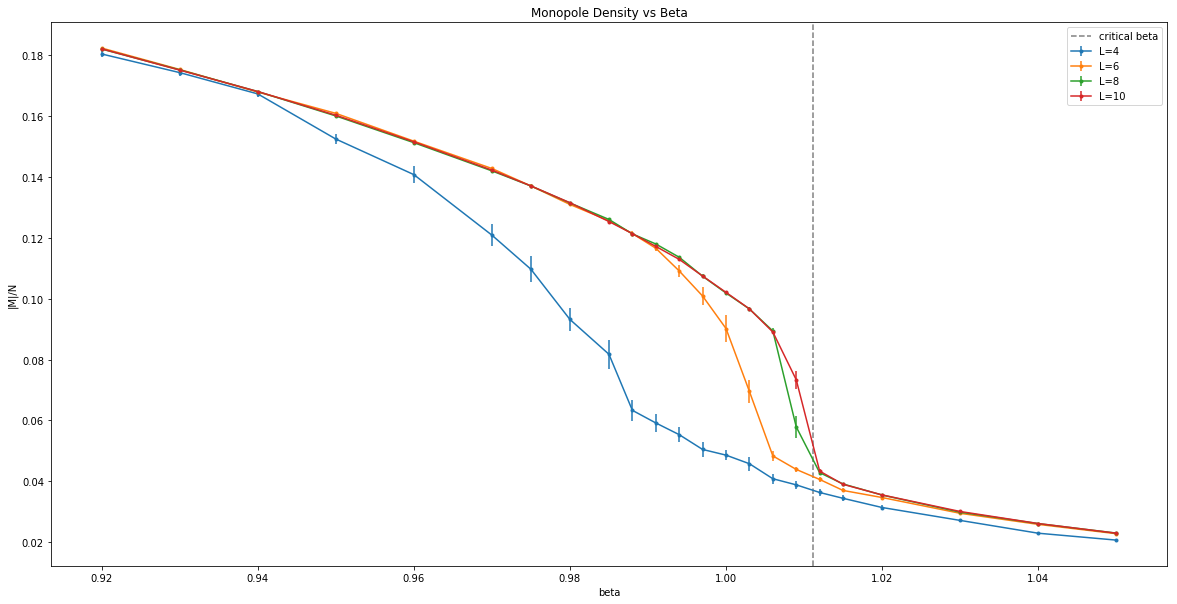

In [3]:
plt.figure()
plot_data(plt, 5)
plt.ylabel('|M|/N')
plt.title('Monopole Density vs Beta')
plt.show()

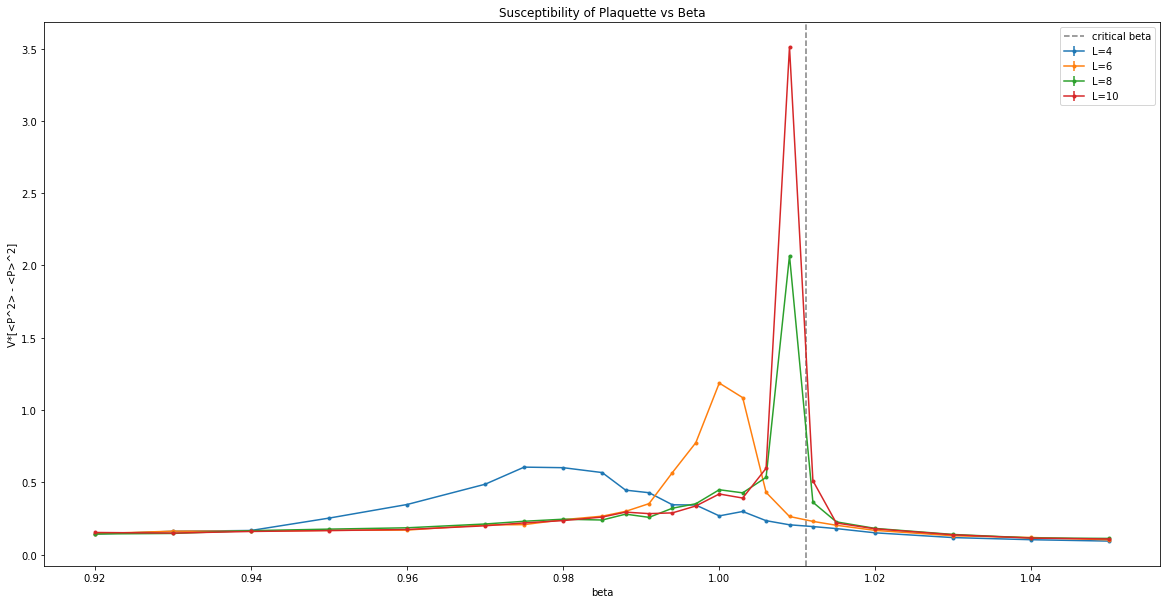

In [4]:
plt.figure()
plot_data(plt, 3)
plt.ylabel('V*[<P^2> - <P>^2]')
plt.title('Susceptibility of Plaquette vs Beta')
plt.show()

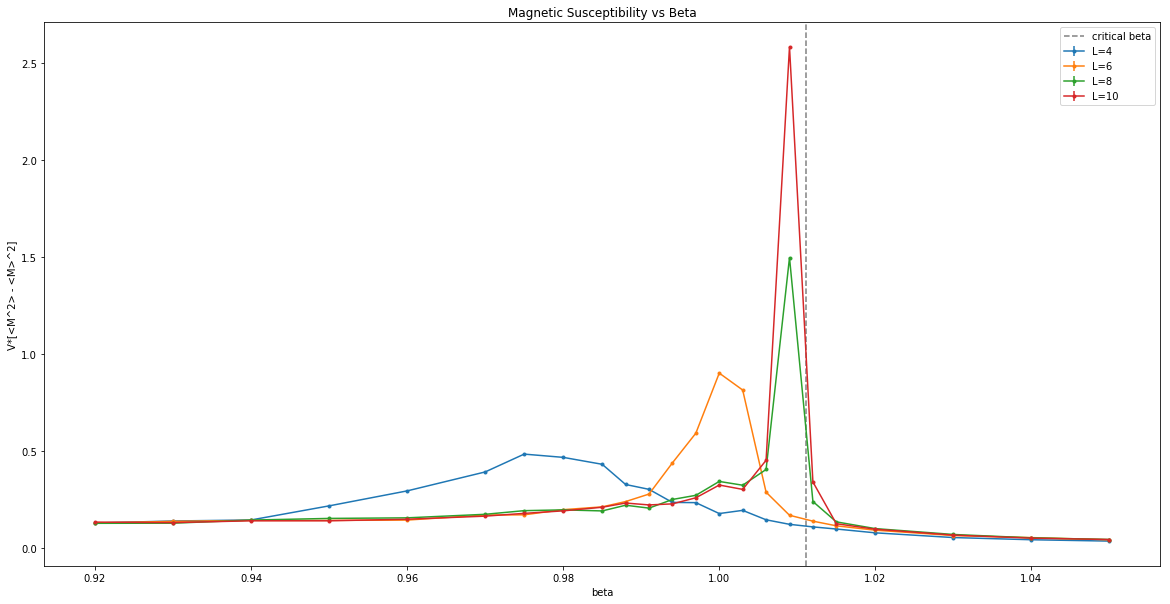

In [5]:
plt.figure()
plot_data(plt, 7)
plt.ylabel('V*[<M^2> - <M>^2]')
plt.title('Magnetic Susceptibility vs Beta')
plt.show()